# Classificação de Bons e Maus Pagadores

Um cliente do setor financeiro forneceu um conjunto de dados contendo informações de diferentes clientes, com o objetivo de identificar bons e maus pagadores. Cada registro do dataset representa um cliente, descrito por diversas variáveis que indicam características financeiras e comportamentais, além da indicação se o cliente é um bom pagador (classe 0) ou mau pagador (classe 1).

O cliente precisa de uma solução automatizada para classificar novos clientes em bons ou maus pagadores de forma eficaz, para otimizar processos de concessão de crédito e minimizar riscos financeiros.

Por se tratar de decisões que envolvem dinheiro real e impacto direto nas operações da empresa, a solução deve atender aos seguintes requisitos essenciais:

- **Desempenho preditivo confiável:** o modelo deve apresentar bom desempenho para garantir decisões adequadas em dados futuros.
- **Interpretabilidade:** o cliente exige que a solução seja compreensível, de modo que os analistas possam identificar quais características influenciam as decisões e justificar os resultados internamente e para órgãos reguladores.
- **Automação:** o processo deve ser automatizado, abrangendo desde o pré-processamento dos dados até a seleção das variáveis mais relevantes e a construção do modelo final.

Sua tarefa é desenvolver uma solução automatizada que atenda a esses objetivos.

A solução entregue deve conter código completo, organizado e documentado, facilitando sua integração ao fluxo operacional do cliente.


# Trabalho Mineração de Dados
**Nome:** Pedro Henrique Duarte **RA**: 812112 \\
**Nome:** Davi Mazocco **RA**: 811546 \\
**Nome:** Gabriel Flora Junqueira **RA**: 814106

## 1. Importando pacotes necessários

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, mean_squared_error,r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

## 2. Importando e tratando a base de dados

In [ ]:
df = pd.read_csv("/content/dados.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
X=df.drop(columns=["class"])
Y=df["class"]


## 3. Análise descritiva das variáveis

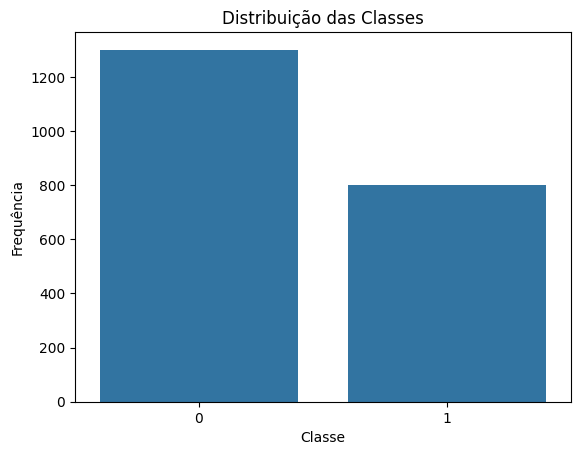

Distribuição percentual:
class
0    61.904762
1    38.095238
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x=Y)
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

print("Distribuição percentual:")
print(Y.value_counts(normalize=True) * 100)

Os dados não são desbalanceados

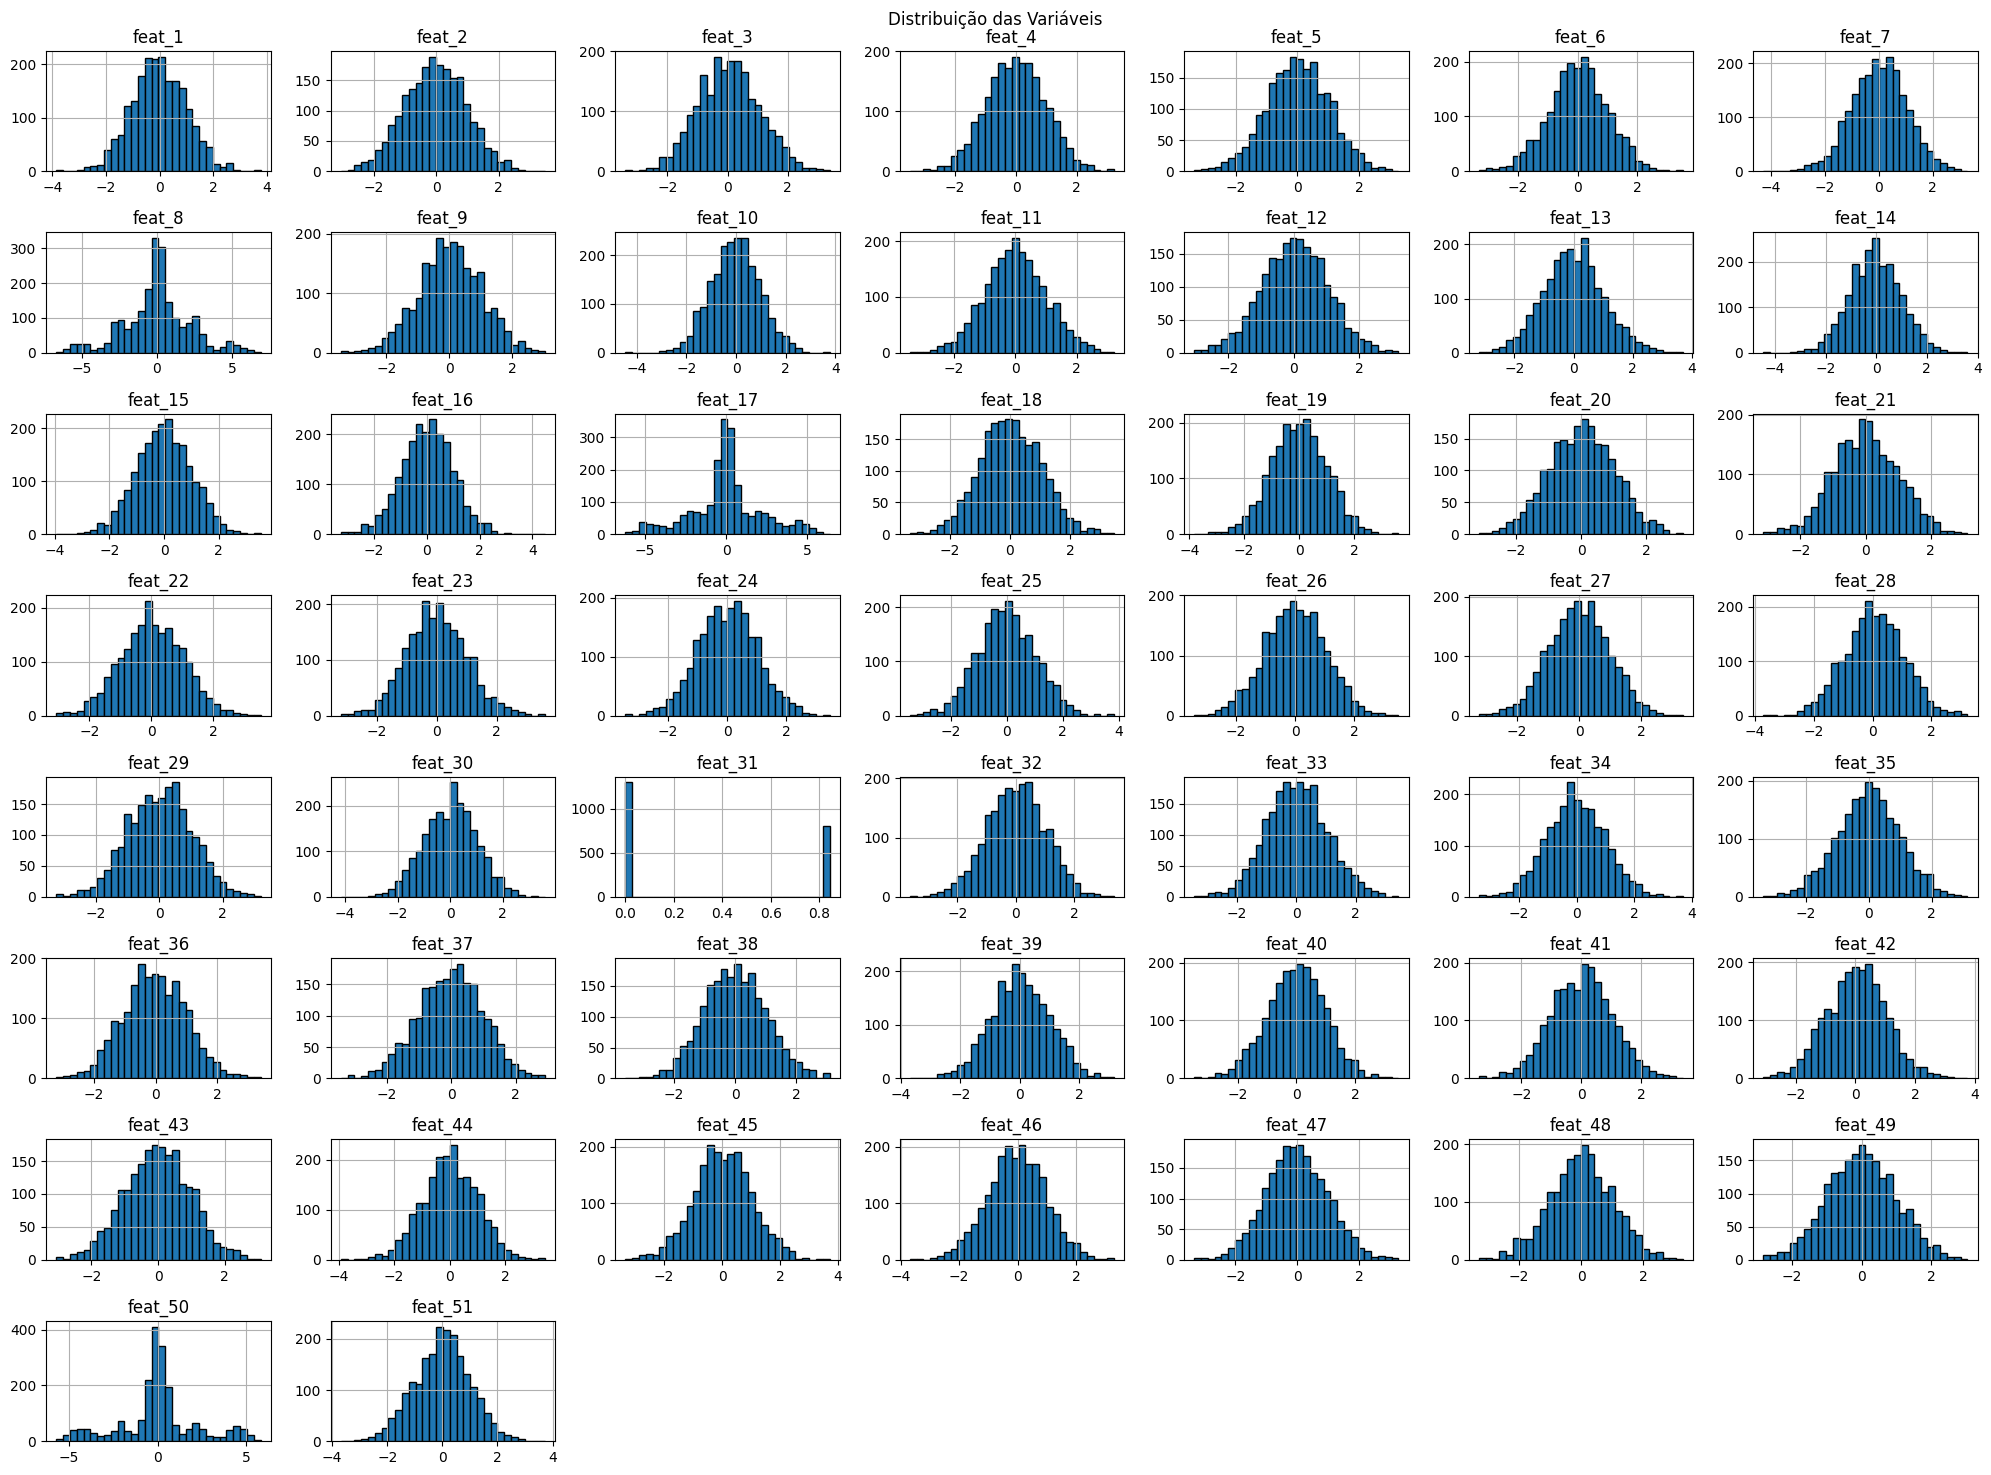

In [ ]:
X.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribuição das Variáveis")
plt.tight_layout()
plt.show()

A covariável feat 31 aparenta ser binária, com valores 0 e 0.8472, aproximadamente; as covariáveis feat 8, feat 17 e feat 50 possuem distribuições semelhantes entre si e diferente das demais, com densidade simétrica e alta próximo de 0. As demais aparentam seguir uma distribuição Normal com média 0 e variância 1.

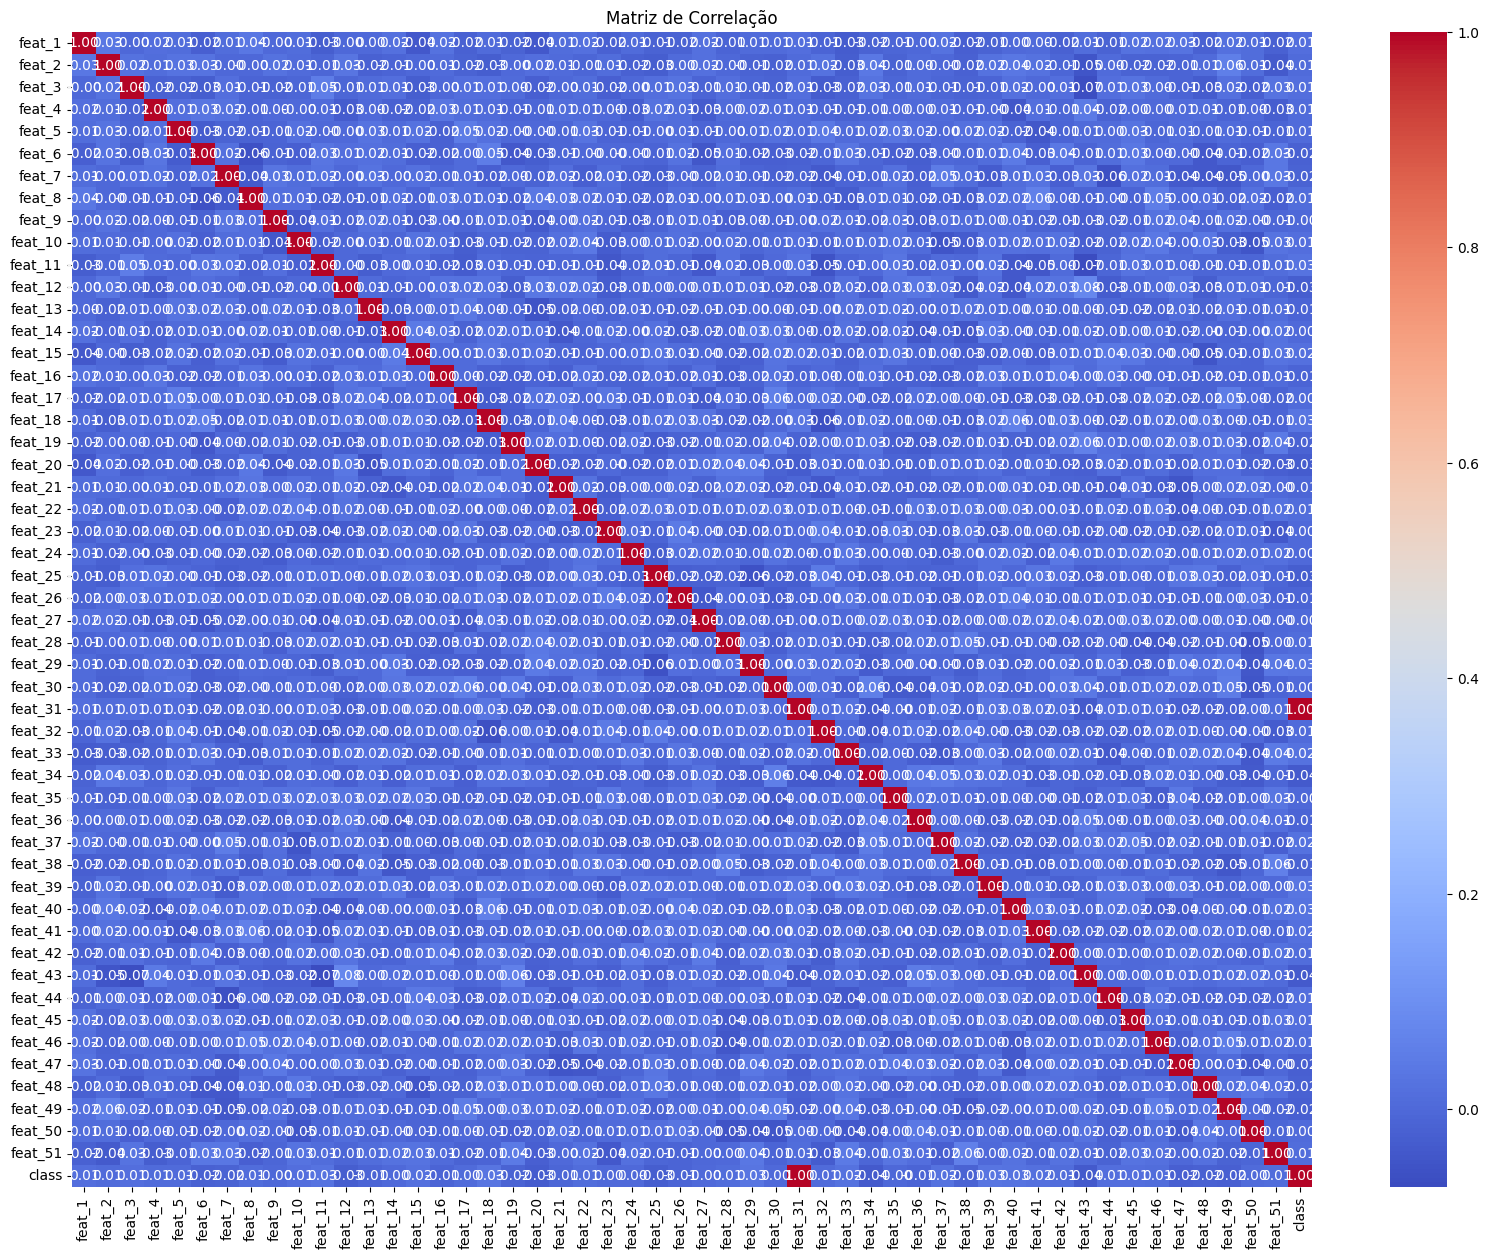

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar o mapa de calor das correlações
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Pode-se observar que a correlação entre a covariável "feat_31" e a variável resposta é igual a 1, então faremos um gráfico de dispersão para entender melhor a relação entre elas.

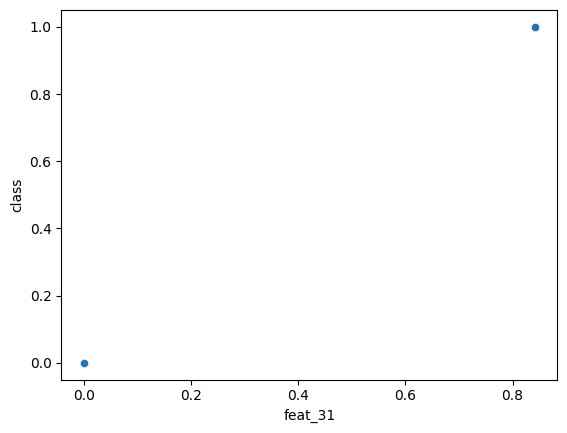

In [ ]:
sns.scatterplot(x=X["feat_31"], y=Y)
plt.show()

Pelo gráfico de dispersão, podemos observar que a covariável "feat_31" é quase igual a variável resposta, pois quando a resposta é 0 a feat 31 também é 0, e quando a resposta é 1, a feat 31 vale 0.8472. Portanto ela será excluída da análise

In [ ]:
X=X.drop(columns=["feat_31"])

## 4. Treino dos modelos

### 4.1 Separando os dados em treino, validação e teste

In [ ]:
# Separando os dados em 60% treino, 20% validação e 20% teste
X_train,X_rest,Y_train,Y_rest=train_test_split(X,Y,test_size=0.4,random_state=123)
X_val,X_test,Y_val,Y_test=train_test_split(X_rest,Y_rest,test_size=0.5,random_state=123)

### 4.2 Treinando um modelo de Regressão Logística

In [ ]:
modelo_escolhido=[]
auc_modelo=[]
precisao=[]
acuracia=[]
recall=[]
threshould_escolhido=[]
f1=[]

In [ ]:
logistica=LogisticRegression()
logistica.fit(X_train,Y_train)
Y_prob=logistica.predict_proba(X_val)[:,0]

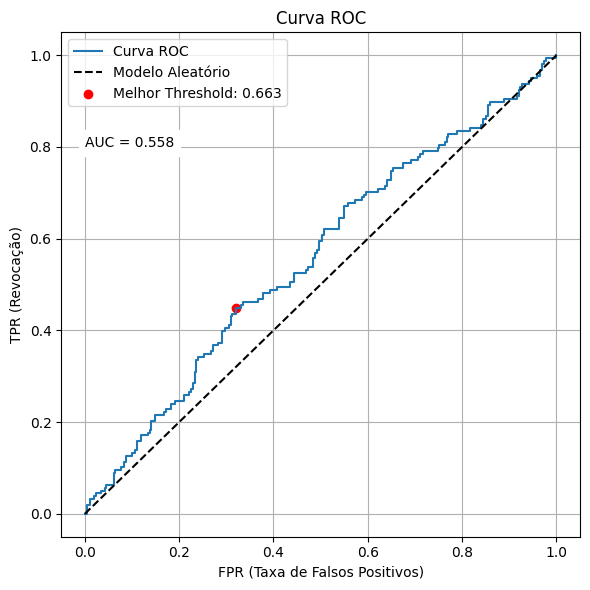

In [ ]:
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleatório")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="upper left")
plt.text(0,0.8,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da análise da curva ROC, observa-se que o modelo de regressão logística não apresentou um bom ajuste aos dados.

In [ ]:
Y_pred=(Y_prob>=melhor_threshould).astype(int)
modelo_escolhido.append("Regressão Logística")
auc_modelo.append(roc_auc)
precisao.append(precision_score(Y_val,Y_pred))
acuracia.append(accuracy_score(Y_val,Y_pred))
recall.append(recall_score(Y_val,Y_pred))
threshould_escolhido.append(melhor_threshould)
f1.append(f1_score(Y_val,Y_pred))

### 4.3 Treinando um modelo KNN

O número de vizinhos que maximiza a acurácia é 25


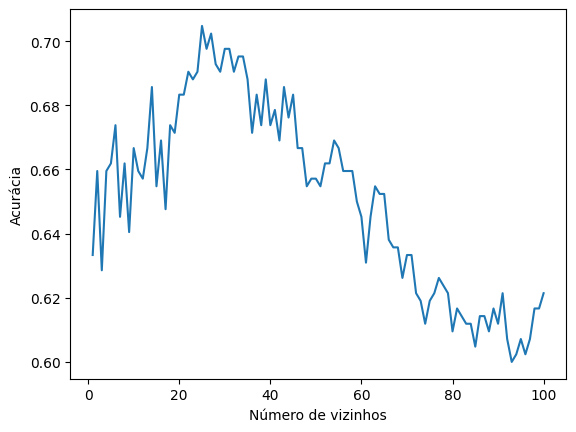

In [ ]:
acuracias_knn=[]
for i in range(1,101):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  Y_pred=knn.predict(X_val)
  acuracias_knn.append(accuracy_score(Y_val,Y_pred))
plt.plot(range(1,101),acuracias_knn)
plt.xlabel("Número de vizinhos")
plt.ylabel("Acurácia")
n_vizinhos=np.argmax(acuracias_knn)+1
print(f"O número de vizinhos que maximiza a acurácia é {n_vizinhos}")

O número de vizinhos que maximiza a acurácia é 25

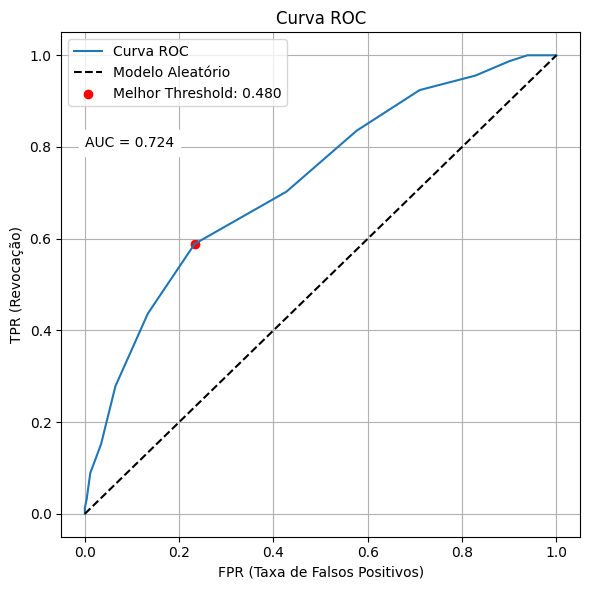

In [ ]:
knn=KNeighborsClassifier(n_neighbors=n_vizinhos)
knn.fit(X_train,Y_train)
Y_prob=knn.predict_proba(X_val)[:,1]
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleatório")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="upper left")
plt.text(0,0.8,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da análise da curva ROC, observa-se que o modelo KNN com 25 vizinhos apresentou um ajuste razoável aos dados, mas pode ser melhorado.

In [ ]:
Y_pred = (Y_prob >= melhor_threshould).astype(int)

# 4. Armazenando os resultados
modelo_escolhido.append(f"KNN com {n_vizinhos} vizinhos")
threshould_escolhido.append(melhor_threshould)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

### 4.4 Treinando um modelo XGBoost

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       262
           1       0.93      0.80      0.86       158

    accuracy                           0.90       420
   macro avg       0.91      0.88      0.90       420
weighted avg       0.91      0.90      0.90       420

Accuracy: 0.9047619047619048


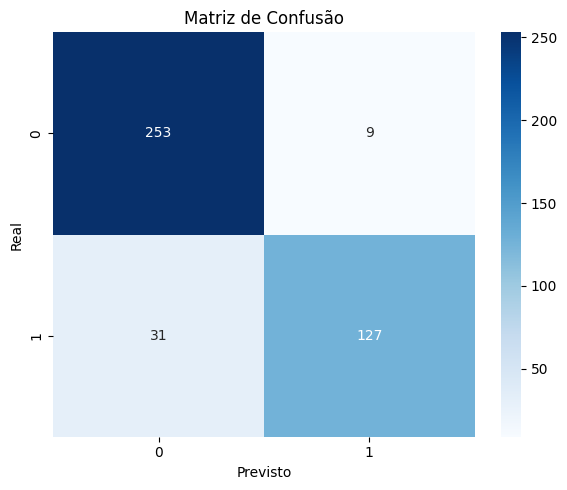

In [ ]:
# Modelo XGBoost
model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Treinamento
model.fit(X_train, Y_train)

# Predição
Y_pred = model.predict(X_val)
Y_prob = model.predict_proba(X_val)[:, 1]
# Avaliação
print("Classification Report:\n", classification_report(Y_val, Y_pred))
print("Accuracy:", accuracy_score(Y_val, Y_pred))

# Matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(Y_val, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
modelo_escolhido.append("XGBoost")
threshould_escolhido.append(0.5)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

A precisão, acurácia e estatística f1 do modelo foram altas, indicando que o modelo apresentou um bom ajuste aos dados.

### 4.5 Treinando modelos de Árvore de Decisão, SVM com PCA e Gradient Boosting


In [ ]:
# SVM com PCA
pca = PCA(n_components=10)  # ou ajuste conforme variância explicada
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
svm_pca = SVC()

# Modelos a serem avaliados
models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM com PCA": svm_pca
}

# Avaliação dos modelos
for name, model in models.items():
    print(f"🔷 --- {name} ---")

    if name == "SVM com PCA":
        model.fit(X_train_pca, Y_train)
        Y_pred = model.predict(X_val_pca)
        Y_prob = model.decision_function(X_val_pca)
    else:
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_val)
        Y_prob = model.predict_proba(X_val)[:,1]

    acc = accuracy_score(Y_val, Y_pred)
    print(f"Acurácia: {acc:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(Y_val, Y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(Y_val, Y_pred))
    print("\n")
    fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
    modelo_escolhido.append(name)
    threshould_escolhido.append(0.5)
    auc_modelo.append(auc(fpr, tpr))
    acuracia.append(accuracy_score(Y_val, Y_pred))
    precisao.append(precision_score(Y_val, Y_pred))
    recall.append(recall_score(Y_val, Y_pred))
    f1.append(f1_score(Y_val, Y_pred))

🔷 --- Árvore de Decisão ---
Acurácia: 0.9524
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.93      0.95      0.94       158

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420

Matriz de Confusão:
[[250  12]
 [  8 150]]


🔷 --- Gradient Boosting ---
Acurácia: 0.9643
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       262
           1       0.93      0.97      0.95       158

    accuracy                           0.96       420
   macro avg       0.96      0.97      0.96       420
weighted avg       0.97      0.96      0.96       420

Matriz de Confusão:
[[251  11]
 [  4 154]]


🔷 --- SVM com PCA ---
Acurácia: 0.7333
Relatório de Classificação:
              precision    recall  f1-score

A Árvore de Decisão e o Gradient Boosting apresentaram métricas altas, se adequando bem aos dados, enquanto o SVM com PCA apresentou métricas razoáveis, piores que os outros métodos

### 4.6 Treinando um modelo de Florestas Aleatórias

In [ ]:
criterios = ['gini', 'entropy',"log_loss"]
features_maximas = ['sqrt', 'log2', None]
for i in criterios:
  for j in features_maximas:
    modelo=RandomForestClassifier(n_estimators=100,criterion=i,max_features=j)
    modelo.fit(X_train,Y_train)
    Y_prob=modelo.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
    melhor_threshould=thresholds[np.argmax(tpr-fpr)]
    threshould_escolhido.append(melhor_threshould)
    modelo_escolhido.append(f"Floresta Aleatória critério {i} e max_f {j}")
    auc_modelo.append(auc(fpr,tpr))
    Y_pred=(Y_prob>=melhor_threshould).astype(int)
    precisao.append(precision_score(Y_val,Y_pred))
    acuracia.append(accuracy_score(Y_val,Y_pred))
    recall.append(recall_score(Y_val,Y_pred))
    f1.append(f1_score(Y_val,Y_pred))


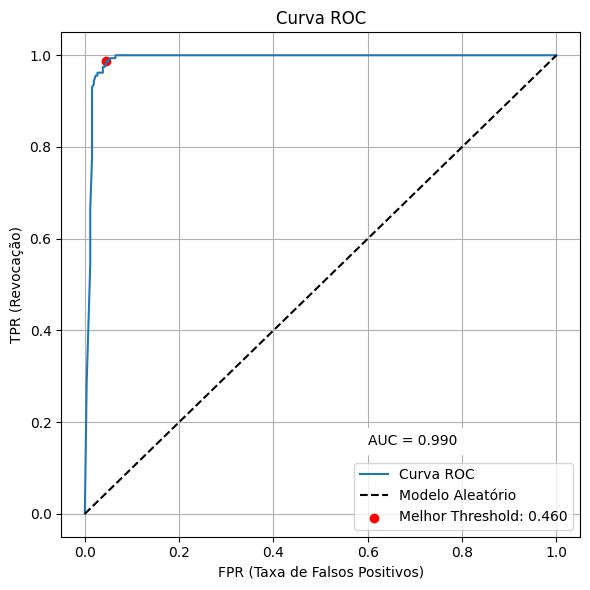

In [ ]:
modelo=RandomForestClassifier(criterion="entropy",max_features=None)
modelo.fit(X_train,Y_train)
Y_prob=modelo.predict_proba(X_val)[:,1]
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleatório")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.text(0.6,0.15,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da análise da curva ROC, observa-se que o modelo de Florestas Aleatórias apresentou um bom ajuste aos dados.

<Axes: title={'center': 'Gráfico de importância das covariáveis'}, xlabel='Covariáveis', ylabel='Importância'>

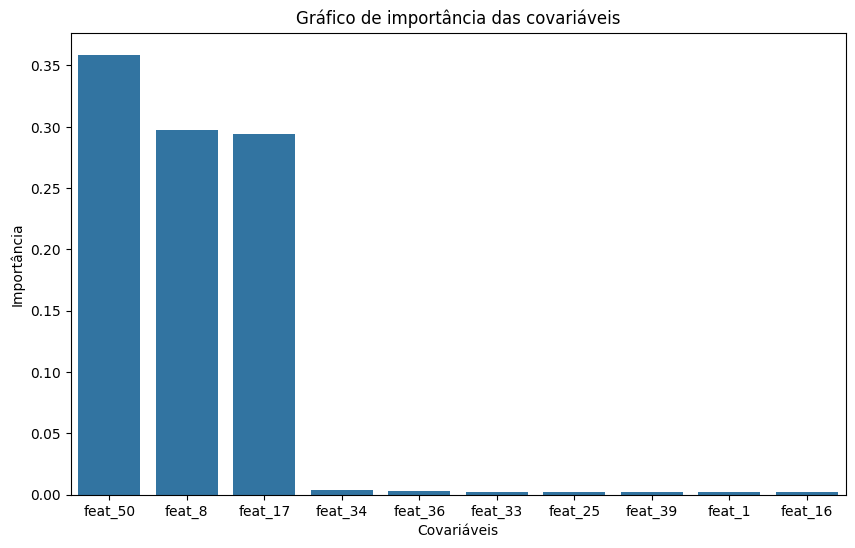

In [ ]:
importancias=pd.Series(modelo.feature_importances_,index=X_train.columns).sort_values(ascending=False)[0:10]
plt.figure(figsize=(10,6))
plt.xlabel("Covariáveis")
plt.ylabel("Importância")
plt.title("Gráfico de importância das covariáveis")
sns.barplot(x=importancias.index,y=importancias)

Pelo gráfico de Importâncias, notamos que as feat 8, 17 e 50 se mostraram significantes para explicar a variável resposta.

### 4.7 Analisando a relação entre as covariáveis feat_50, feat_8 e feat_17 com a variáveil resposta

In [ ]:
df_0=df[df["class"]==0]
df_1=df[df["class"]==1]

figura=go.Figure()
figura.add_trace(go.Scatter3d(x=df_0['feat_50'], y=df_0['feat_8'],z=df_0['feat_17'], mode='markers', marker=dict(color="royalblue"),name="Classe 0"))
figura.add_trace(go.Scatter3d(x=df_1['feat_50'], y=df_1['feat_8'],z=df_1['feat_17'], mode='markers', marker=dict(color="red"),name="Classe 1"))
figura.update_layout(
        title='',
        scene=dict(
            xaxis_title='feat_50',
            yaxis_title='feat_8',
            zaxis_title='feat_17'
        ),
        template='plotly_white',
        showlegend=True
    )
figura.show()

Pelo gráfico, podemos observar o comportamento entre as covariáveis e a variável resposta. Nele, podemos ver camadas separadas entre as classes mostrando uma discriminação clara. Com isso, o modelo KNN apenas com estas 3 covariáveis pode ser mais eficiente.

### 4.8 Regressão Logística apenas com as features 8, 17 e 50

In [ ]:
X_train_2=X_train[["feat_50","feat_8","feat_17"]]
X_val_2=X_val[["feat_50","feat_8","feat_17"]]
X_test_2=X_test[["feat_50","feat_8","feat_17"]]

In [ ]:
logistica=LogisticRegression()
logistica.fit(X_train_2,Y_train)
Y_prob=logistica.predict_proba(X_val_2)[:,0]

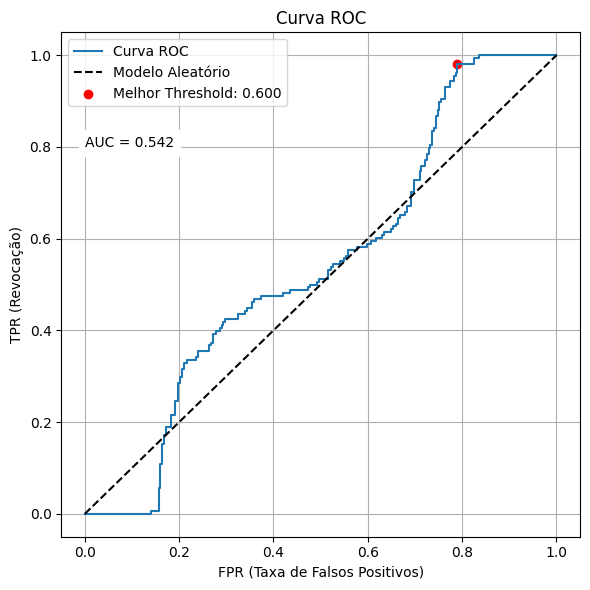

In [ ]:
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleatório")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="upper left")
plt.text(0,0.8,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

O desempenho da Regressão Logística utilizando apenas as 3 covariáveis selecionadas anteriormente ficou ruim, e outros modelos apresentaram melhor desempenho.

In [ ]:
Y_pred = (Y_prob >= melhor_threshould).astype(int)

modelo_escolhido.append("Regressão Logística (df reduzido)")
threshould_escolhido.append(melhor_threshould)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

### 4.9 KNN apenas com as features 8, 17 e 50

O número de vizinhos que maximiza a acurácia é 4


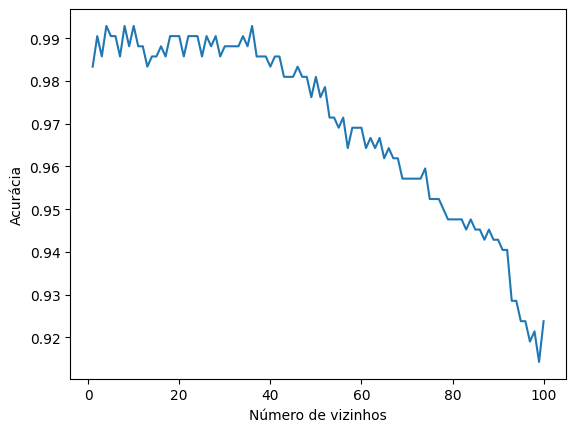

In [ ]:
acuracias_knn=[]
for i in range(1,101):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_2,Y_train)
  Y_pred=knn.predict(X_val_2)
  acuracias_knn.append(accuracy_score(Y_val,Y_pred))
plt.plot(range(1,101),acuracias_knn)
plt.xlabel("Número de vizinhos")
plt.ylabel("Acurácia")
n_vizinhos=np.argmax(acuracias_knn)+1
print(f"O número de vizinhos que maximiza a acurácia é {n_vizinhos}")

O número de vizinhos que maximiza a acurácia é o KNN com 4 vizinhos.

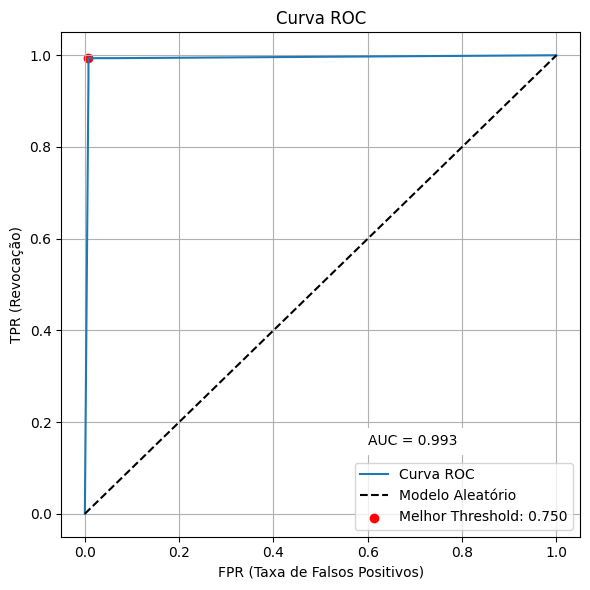

In [ ]:
knn=KNeighborsClassifier(n_neighbors=n_vizinhos)
knn.fit(X_train_2,Y_train)
Y_prob=knn.predict_proba(X_val_2)[:,1]
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleatório")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.text(0.6,0.15,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da análise da curva ROC, observa-se que o modelo KNN com 4 vizinhos apresentou um ajuste muito bom aos dados.

In [ ]:
Y_pred = (Y_prob >= melhor_threshould).astype(int)

# Armazenando os resultados
modelo_escolhido.append(f"KNN com {n_vizinhos} vizinhos (df reduzido)")
threshould_escolhido.append(melhor_threshould)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

## 5. Escolha do modelo

In [ ]:

pd.DataFrame({"Modelo":modelo_escolhido,"AUC":auc_modelo,"Threshold":threshould_escolhido,"Precisão":precisao,"Acurácia":acuracia,"Recall":recall,"F1":f1})

,Modelo,AUC,Threshold,Precisão,Acurácia,Recall,F1
0,Regressão Logística,0.558484,0.663418,0.458065,0.592857,0.449367,0.453674
1,KNN com 25 vizinhos,0.723621,0.480000,0.603896,0.700000,0.588608,0.596154
2,XGBoost,0.971447,0.500000,0.933824,0.904762,0.803797,0.863946
3,Árvore de Decisão,0.951783,0.500000,0.925926,0.952381,0.949367,0.937500
4,Gradient Boosting,0.987861,0.500000,0.933333,0.964286,0.974684,0.953560
5,SVM com PCA,0.770920,0.500000,0.592742,0.733333,0.930380,0.724138
6,Floresta Aleatória critério gini e max_f sqrt,0.877838,0.400000,0.661836,0.783333,0.867089,0.750685
7,Floresta Aleatória critério gini e max_f log2,0.827773,0.370000,0.592437,0.728571,0.892405,0.712121
8,Floresta Aleatória critério gini e max_f None,0.990047,0.390000,0.923977,0.969048,1.000000,0.960486
9,Floresta Aleatória critério entropy e max_f sqrt,0.900437,0.430000,0.688119,0.804762,0.879747,0.772222


Dentre os modelos avaliados, o KNN com 4 vizinhos, utilizando apenas as covariáveis feat_8, feat_17 e feat_50, apresentou o maior valor de AUC, sendo, portanto, o que melhor se ajusta aos dados. Além disso, as demais métricas - recall, precisão, acurácia e F1-score - também foram satisfatórias, indicando que o modelo é eficaz na classificação de novos clientes como bons ou maus pagadores. Assim, o modelo escolhido será o KNN com 4 vizinhos utilizando as covariáveis anteriores.

## 6. Avaliação do modelo escolhido

Agora iremos calcular as métricas do modelo escolhido no conjunto de teste

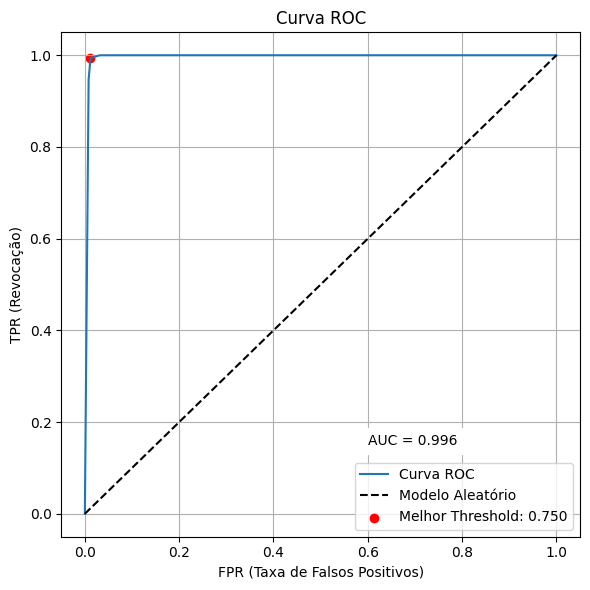

In [ ]:
knn=KNeighborsClassifier(n_neighbors=n_vizinhos)
knn.fit(X_train_2,Y_train)
Y_prob=knn.predict_proba(X_test_2)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=0.75
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleatório")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.text(0.6,0.15,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
    Y_pred = (Y_prob >= melhor_threshould).astype(int)
    acc = accuracy_score(Y_test, Y_pred)
    print(f"Acurácia: {acc:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(Y_test, Y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(Y_test, Y_pred))

Acurácia: 0.9905
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       251
           1       0.98      0.99      0.99       169

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

Matriz de Confusão:
[[248   3]
 [  1 168]]


## 7. Conclusão

O modelo escolhido continuou apresentando ótimos resultados preditivos no conjunto de teste, com todas as métricas muito próximas de 1, errando apenas 4 predições. Assim, este modelo é eficaz em classificar novos clientes como bons ou maus pagadores, reduzindo a taxa de Inadimplência e aumentando o lucro do nosso cliente.